<a href="https://colab.research.google.com/github/Leonardopedroti/ANA_shapefile/blob/main/ANA_Shapefile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Acesso ao banco de dados de monitoramento da Agência Nacional de Águas (ANA) utilizando arquivo shapefile do IBGE.

In [ ]:
#Instalação e importação dos pacotes
!pip install --upgrade geopandas
!pip install --upgrade rasterio
!pip install --upgrade rasterstats
!pip install pyproj
!pip install shapely
!pip install hydrobr
!pip install seaborn
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import os
from rasterstats import zonal_stats
from shapely.geometry import Point
import hydrobr
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image
import folium

In [ ]:
!pip install Windrose
from windrose import WindroseAxes

Text(0.5, 1.0, 'Mapa com limites municipais do Estado de São Paulo')

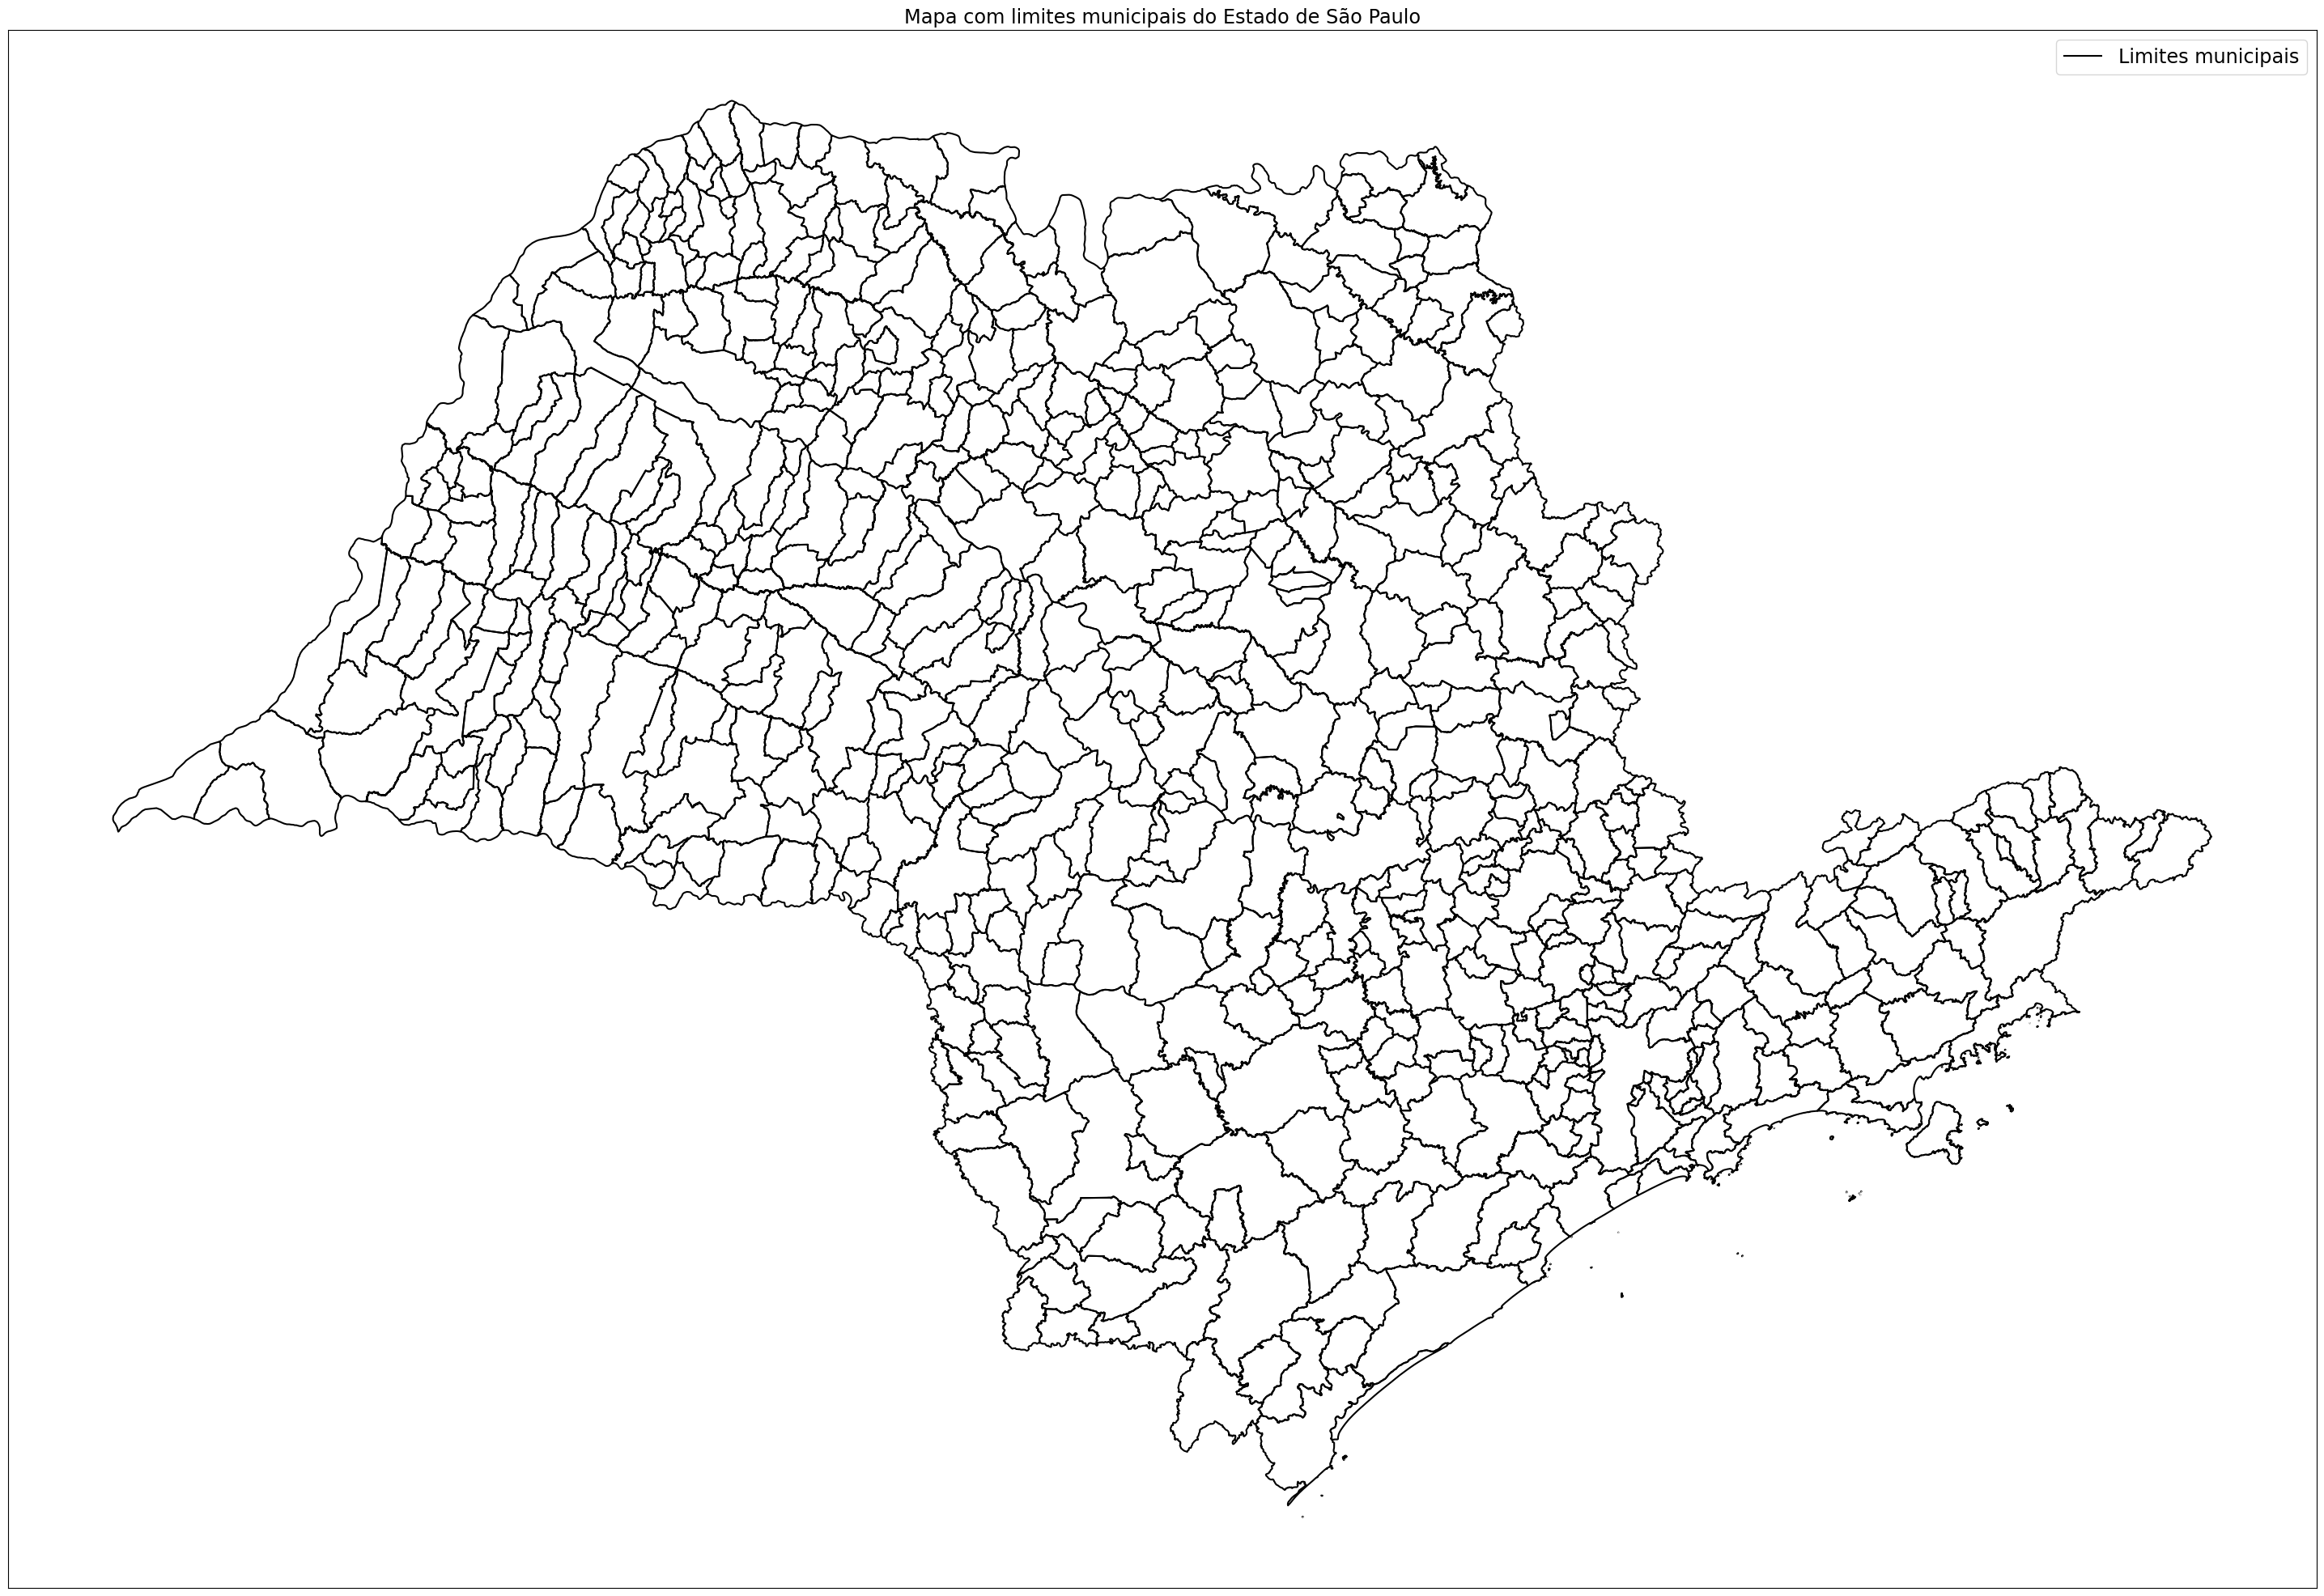

In [ ]:
#Importação do arquivo Shapefile da base de dados do IBGE
adc = gpd.read_file('/content/SP_Municipios_2022.shp')

#Visualização do arquivo shapefile dos limites municipais de cada cidade do estado de Estado de São Paulo.
fig, ax = plt.subplots(figsize = (50, 25))
plt.xticks([])
plt.yticks([])
adc['geometry'].boundary.plot(ax = ax, color = 'black')
plt.legend(['Limites municipais'], fontsize='xx-large')
plt.title('Mapa com limites municipais do Estado de São Paulo', fontsize='xx-large')

<Axes: title={'center': 'Municípios selecionados'}>

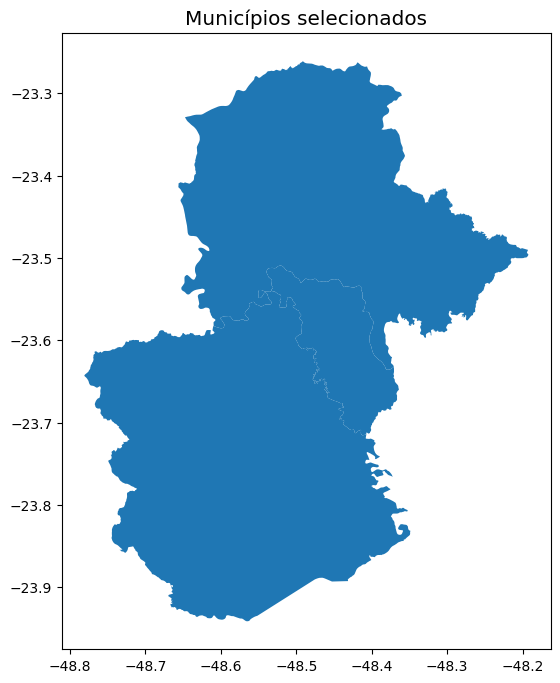

In [ ]:
#Extração dos municipios de interesse com base no atributo "NM_MUN".
municipio = adc[adc['NM_MUN'].isin(['Buri', 'Campina do Monte Alegre', 'Angatuba'])]
fig, ax = plt.subplots(figsize=(9, 8))
plt.title('Municípios selecionados', fontsize='x-large')
municipio.plot(ax=ax)

In [ ]:
#Importação do banco de dados da 'ANA' com as suas respectivas estações de monitoramento.
lista_estaçoes_geral = hydrobr.get_data.ANA.list_prec_stations()

#Extração das cidades de interesse.
lista_estaçoes_city = lista_estaçoes_geral[lista_estaçoes_geral['City'].isin(['BURI', 'CAMPINA DO MONTE ALEGRE', 'ANGATUBA'])]

#Conversão das cidades escolhidas em dataframe do Pandas
df = pd.DataFrame(lista_estaçoes_city)

#Extração dos atributos Lat/Long do respectivo dataframe
lat_long = ['Latitude', 'Longitude']
lat_long_extraidas = df[lat_long]

#Exportação do dataframe Lat/Long para um formato csv
lat_long_extraidas.to_csv('lat_long_extraidas.csv', index=False)

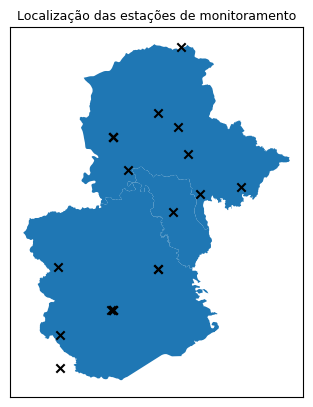

<Figure size 3000x2000 with 0 Axes>

In [ ]:
#Importação do arquivo 'lat_long_extraidas.csv' para o drive
coordenadas_caminho = ('/content/lat_long_extraidas.csv')

#União dos arquivos shapefile com as coordenadas lat/long das estações de monitoramento
municipio = adc[adc['NM_MUN'].isin(['Buri', 'Campina do Monte Alegre', 'Angatuba'])]
municipio.plot()
lat_long = ['Latitude', 'Longitude']
lat_long_extraidas = df[lat_long]

#Adicionando marcações referente as estações de monitoramento
plt.scatter(lat_long_extraidas['Longitude'], lat_long_extraidas['Latitude'], color='black', marker='x')
plt.title('Localização das estações de monitoramento', fontsize='9')

#Removendo as coordenadas dos eixos x e y
plt.xticks([])
plt.yticks([])
plt.figure(figsize=(30, 20))
plt.show()

##Visualização dos Municípios no Folium

In [ ]:
coordenadas = gpd.read_file(coordenadas_caminho)
coordenadas['geometry'] = coordenadas.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
shapefile_combinado = gpd.overlay(adc, coordenadas, how='union')
shapefile_combinado.to_file("/content/bacias_municipio.shp")

In [ ]:
shapefile_combinado_path = "/content/bacias_municipio.shp"
shapefile_combinado = gpd.read_file(shapefile_combinado_path)
mapa = folium.Map(location=[shapefile_combinado.geometry.centroid.y.mean(), shapefile_combinado.geometry.centroid.x.mean()], zoom_start=10)
folium.GeoJson(shapefile_combinado).add_to(mapa)
mapa

##Acesso direto ao banco de dados do IBGE

In [16]:
import sys
sys.path.append('../')

sys.path = sys.path + ['/home/joaom/projects/geobr/python-package/.env/lib/python3.7/site-packages']

In [ ]:
!pip install geobr

In [ ]:
!pip install s2

In [ ]:
!pip install geojson

In [20]:
import geobr
import geopandas as gpd
from s2 import s2
import geojson
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
states = geobr.read_state(code_state='all', year=2015)

In [32]:
states.head(27)

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.86662 -7.97587, -62.85336 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99737 ..."
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ..."
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.49717 -2.78451, -40.48429 ..."


<Axes: >

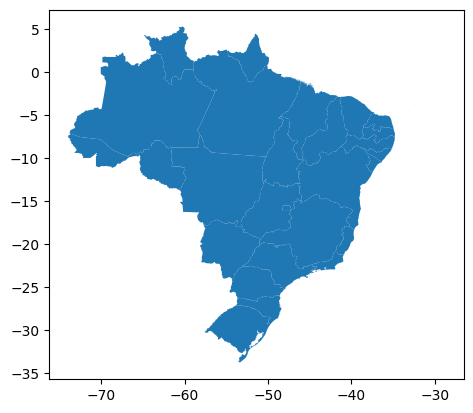

In [28]:
states.plot()